In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
df= pd.read_csv("C:\\Users\\new\\Downloads\\housing.csv",header= None ,delimiter="\\s+", names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### CRIM: per capita crime rate by town
### ZN: proportion of residential land zoned for lots over 25,000 sq.ft.### 
INDUS: proportion of non-retail business acres per town### 
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise### )
NOX: nitric oxides concentration (parts per 10 millie### t 124
RM: average number of rooms per dw### elling
AGE: proportion of owner-occupied units built prior ### to 1940
DIS: weighted distances to ﬁve Boston employment###  centers
RAD: index of accessibility to radial###  highways
TAX: full-value property-tax rate p### er $10,000
PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the###  population
MEDV: Median value of owner-occupied homes in $1000s

# Basic checks

In [6]:
df.shape

(506, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
## there is no null values in this dataset.

In [16]:
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# EDA

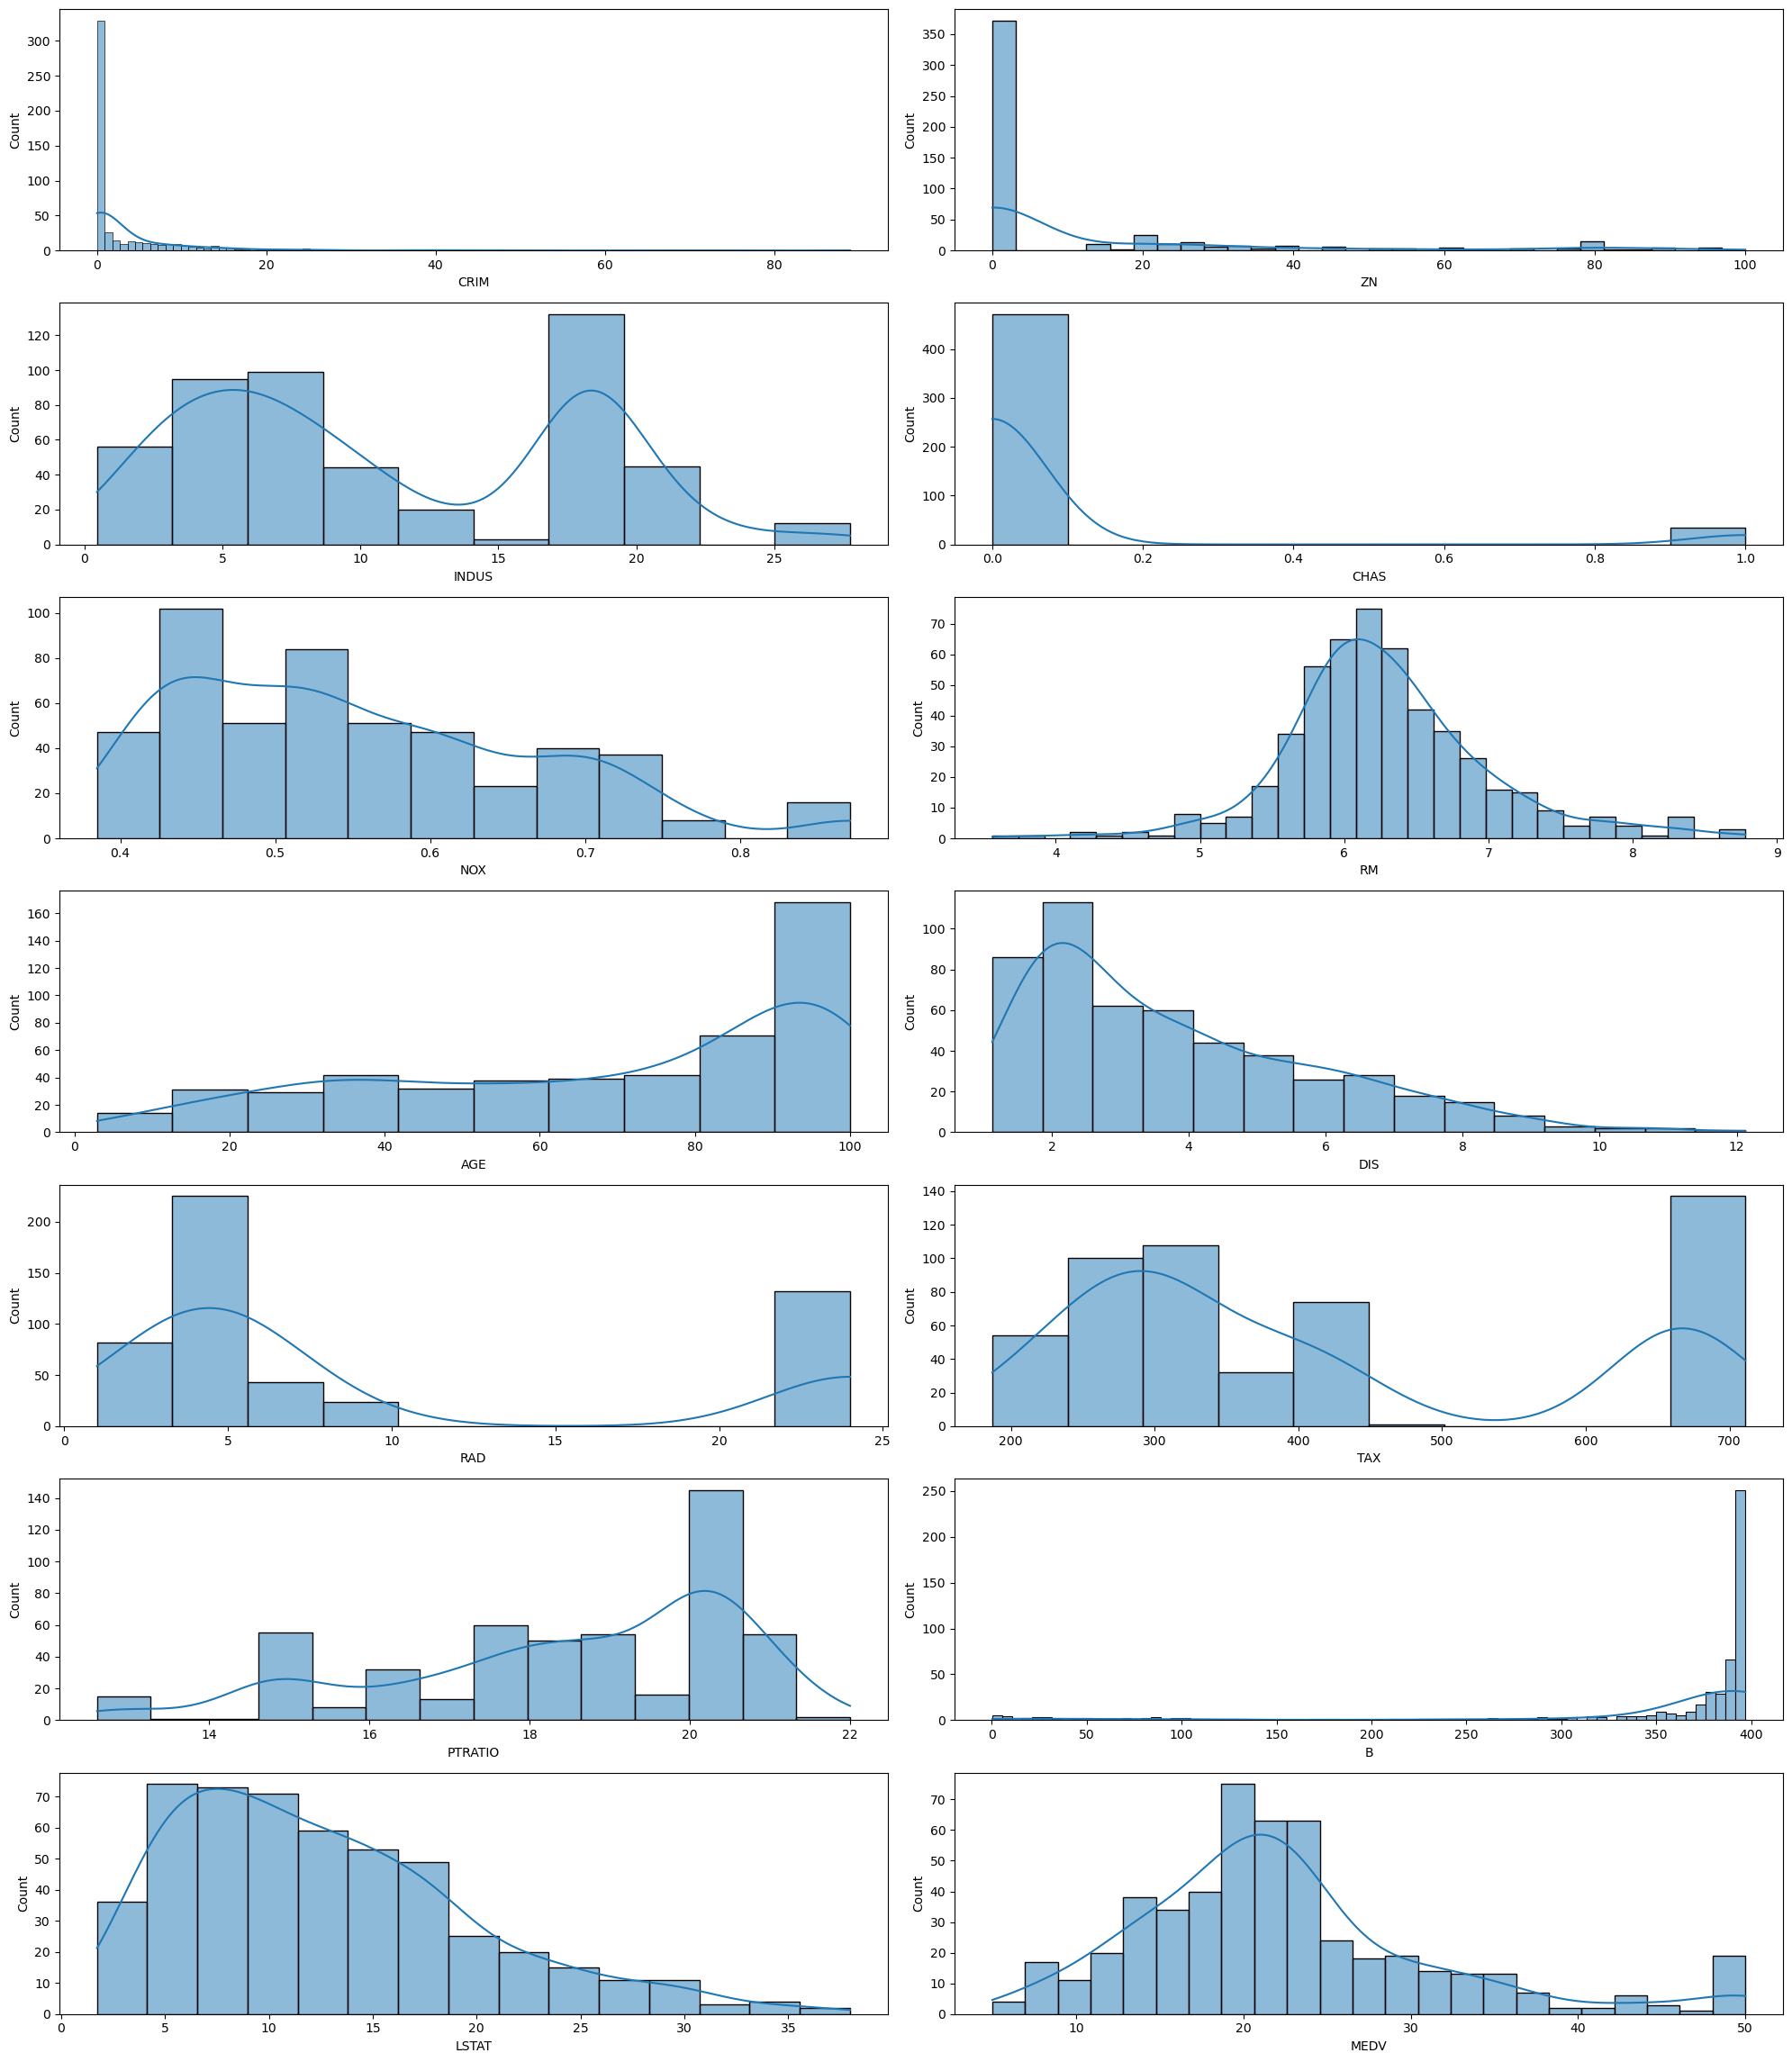

In [10]:
# univariate analysis
plt.figure(figsize=(20,23),facecolor='white')
pltno =1
for i in df.columns:
    plt.subplot(7,2,pltno)
    sns.histplot(x=df[i], kde=True)
    pltno=pltno+1
    plt.tight_layout()

In [11]:
# all the datas are skewed. its clear from the above visualization.so there might be outliers in all columns

<Axes: xlabel='TAX', ylabel='MEDV'>

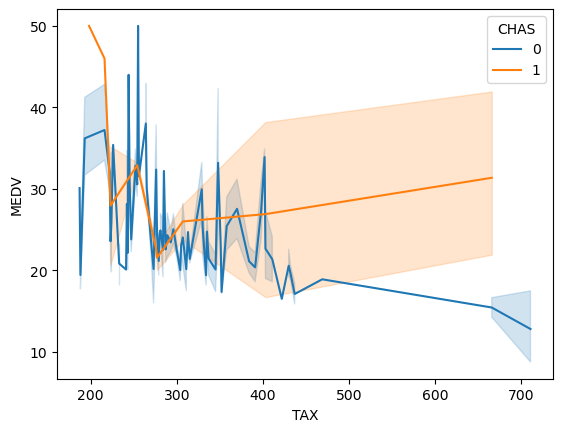

In [35]:
sns.lineplot(x='TAX',y="MEDV", hue="CHAS", data=df)

Text(0, 0.5, 'MEDV ( Median value of owner-occupied homes in $1000s)')

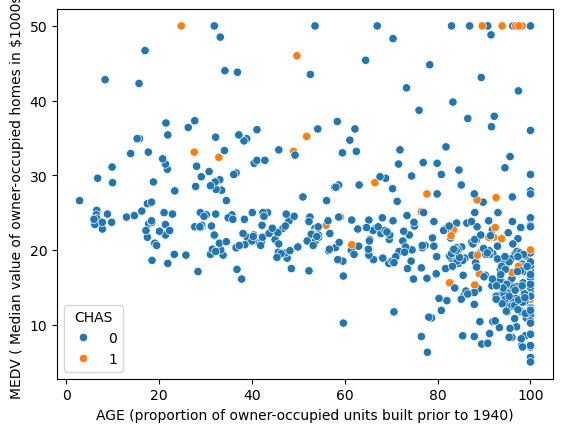

In [29]:
 sns.scatterplot(x='AGE', y='MEDV',hue='CHAS', data=df)
plt.xlabel("AGE (proportion of owner-occupied units built prior to 1940)")
plt.ylabel("MEDV ( Median value of owner-occupied homes in $1000s)")


In [ ]:
# so here we can say that as the AGE increases the price of the house decreases

<Axes: xlabel='CRIM', ylabel='MEDV'>

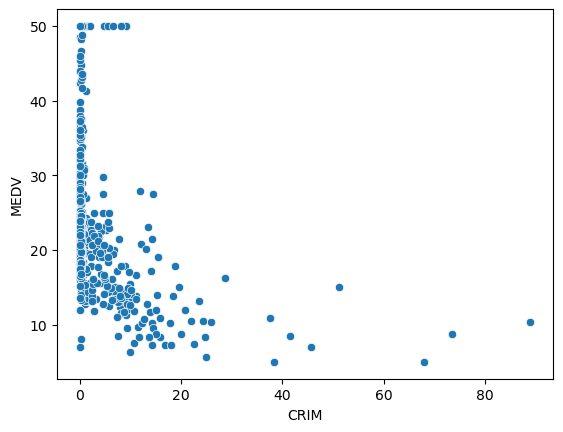

In [47]:
sns.scatterplot(x='CRIM', y='MEDV', data=df)

In [48]:
# as the crime rate decreases the house price increases

Text(0, 0.5, 'CHAS(Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)')

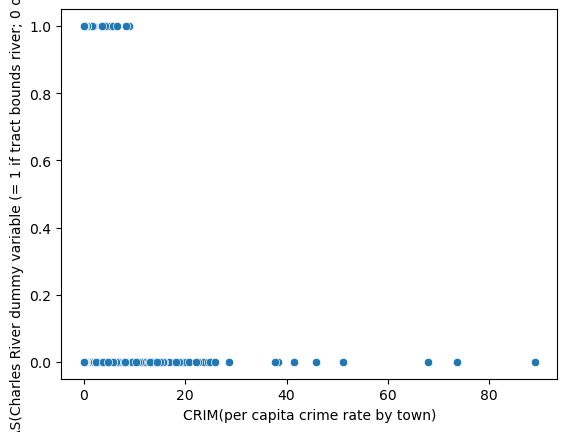

In [34]:
sns.scatterplot(x='CRIM', y='CHAS', data=df)
plt.xlabel("CRIM(per capita crime rate by town)")
plt.ylabel("CHAS(Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)")

In [25]:
## crime rate is high in the town and very less in the are near charles river.

Text(0, 0.5, 'MEDV( Median value of owner-occupied homes in $1000s)')

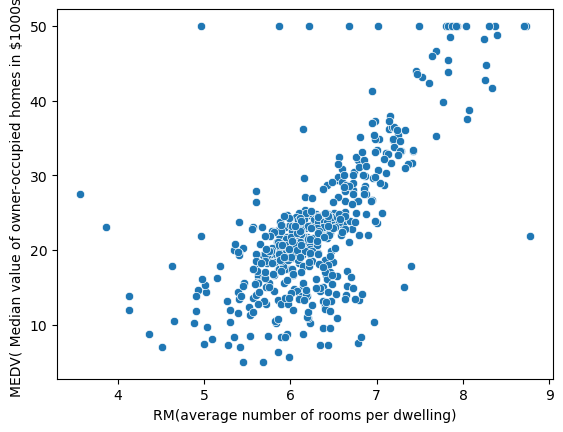

In [33]:
sns.scatterplot(x='RM', y='MEDV', data=df)
plt.xlabel("RM(average number of rooms per dwelling)")
plt.ylabel("MEDV( Median value of owner-occupied homes in $1000s)")


In [ ]:
## Here we can see an increasein house value as the no. of rooms increases.
# there are lot of 5.5 to 7 room houses that has value ranges between 10,000 and 36,000.

Text(0, 0.5, 'MEDV( Median value of owner-occupied homes in $1000s)')

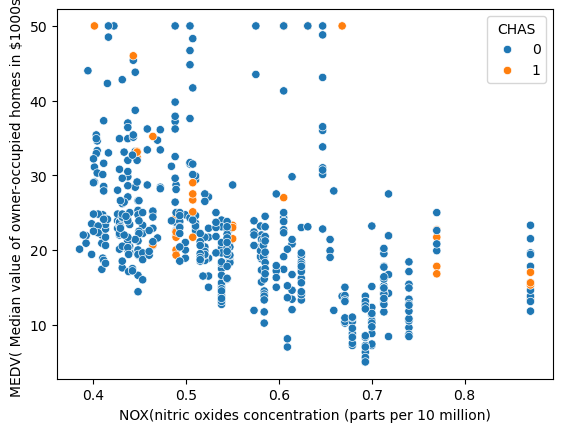

In [41]:
sns.scatterplot(x='NOX', y='MEDV',hue='CHAS', data=df)
plt.xlabel("NOX(nitric oxides concentration (parts per 10 million)")
plt.ylabel("MEDV( Median value of owner-occupied homes in $1000s)")


In [42]:
# high valued houses are sitting in an area where nitric oxide concentration below 0.68.
## most of the houses are in area where NO concentration is below 0.75.

Text(0.5, 0, 'LSTAT(% lower status of the population)')

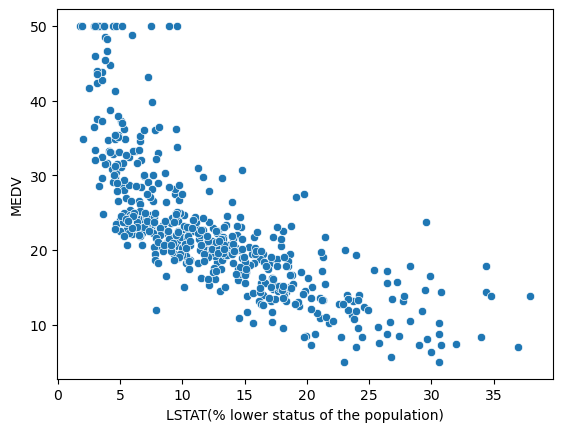

In [45]:
sns.scatterplot(x='LSTAT', y='MEDV',data=df)
plt.xlabel("LSTAT(% lower status of the population)")
# here as the LSTAT increases the price of the house decreases.

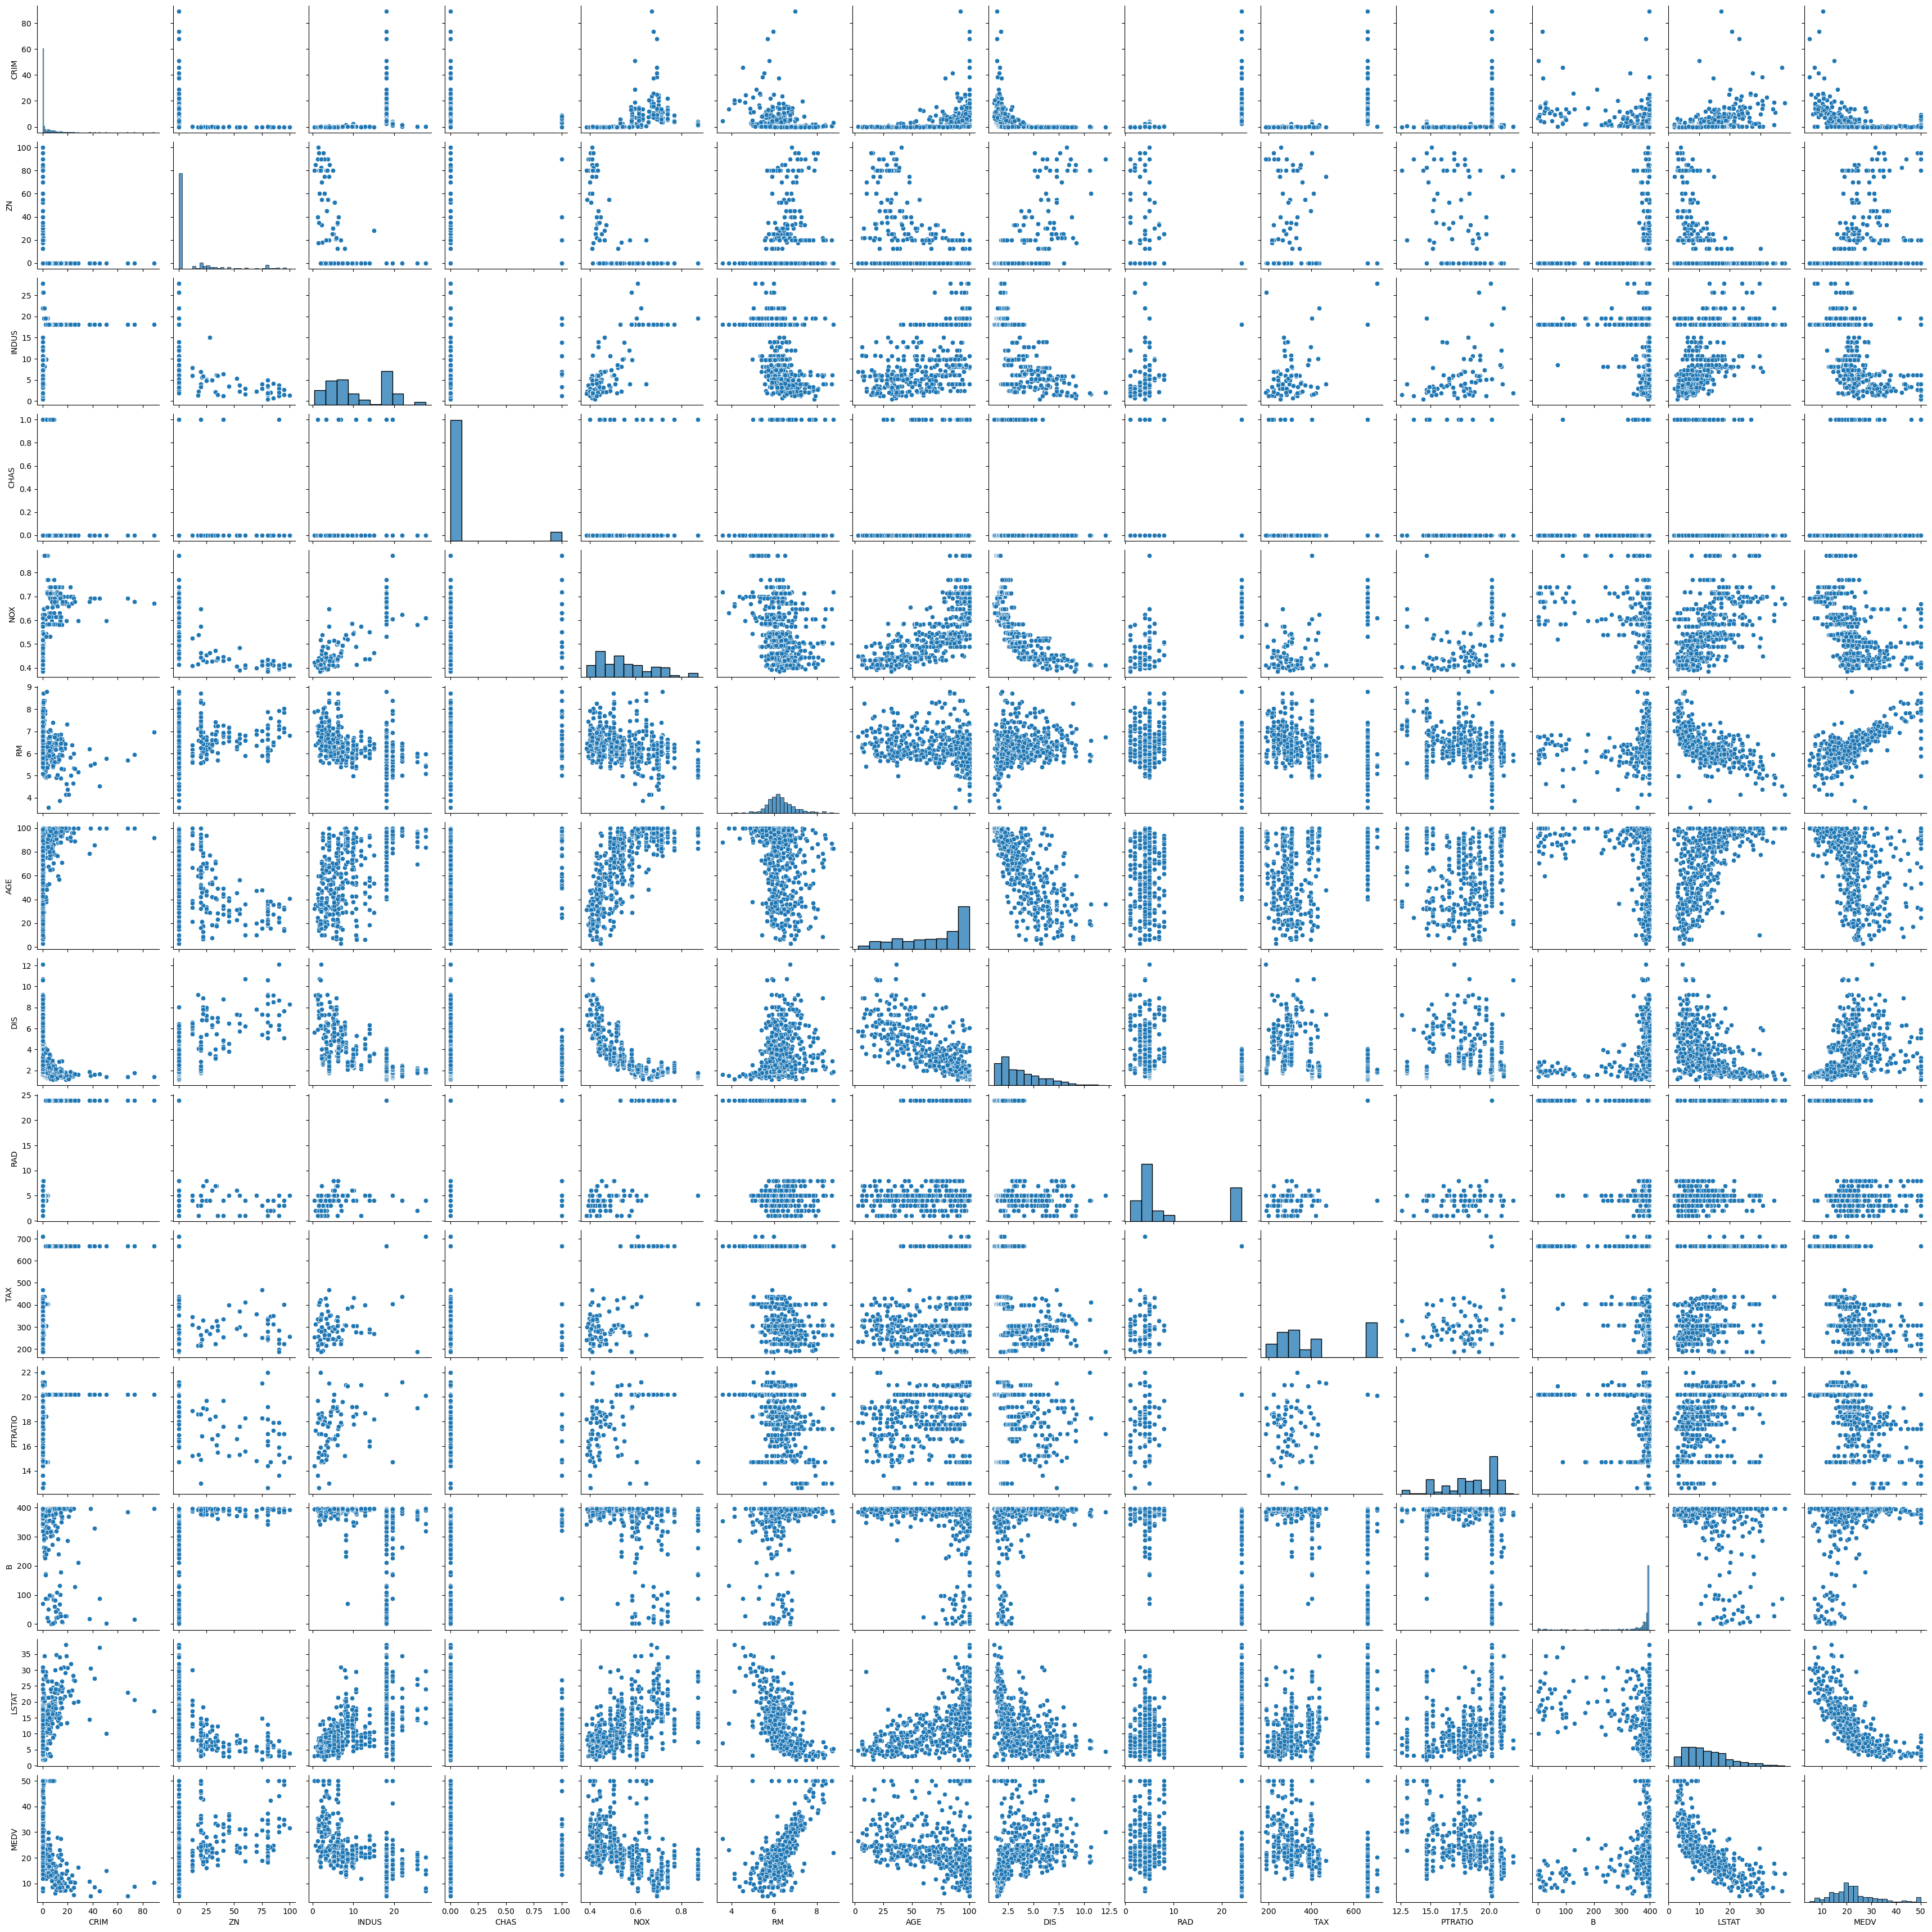

In [43]:
sns.pairplot(df)

In [52]:
# checking for duplicates
df.duplicated().sum()
#no duplicates in the dataset

0

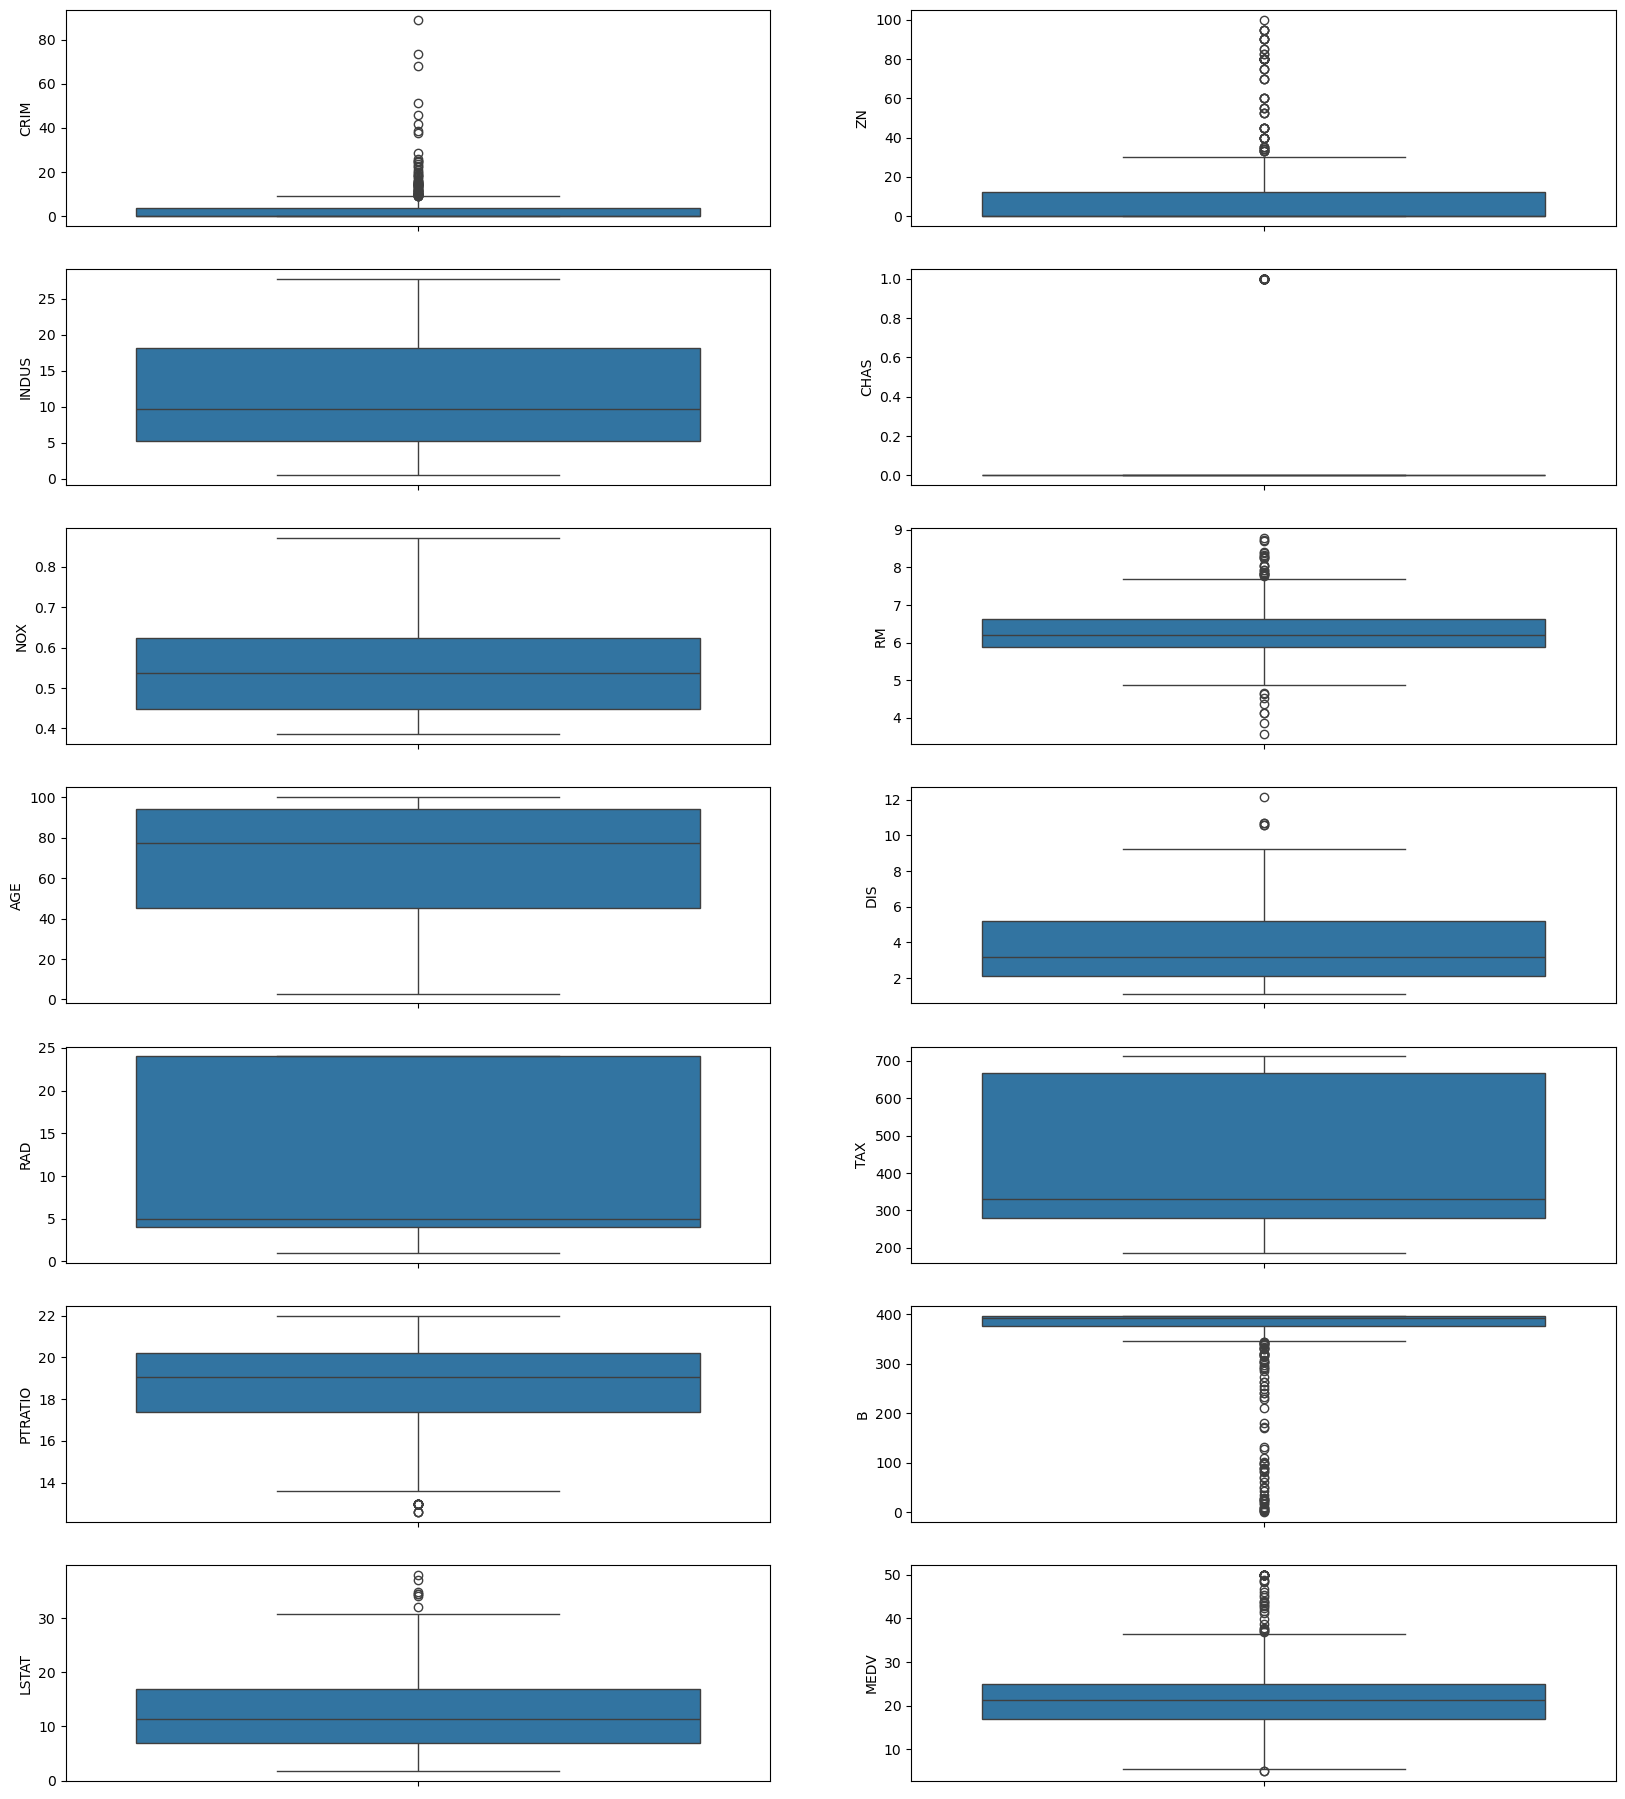

In [55]:
# checking for outliers
plt.figure(figsize=(20,23))
pltno=1
for i in df.columns:
    plt.subplot(7,2,pltno)
    sns.boxplot(df[i])
    pltno+=1

In [59]:
df.loc[df.CRIM>25,'CRIM']=np.median(df.CRIM)

In [62]:
df.loc[df.ZN>60,'ZN']=np.median(df.ZN)
df.loc[df.PTRATIO<13,'PTRATIO']=np.median(df.PTRATIO)
df.loc[df.LSTAT>35,'LSTAT']=np.median(df.LSTAT)
df.loc[df.RM<4.5,'RM']=np.median(df.RM)
df.loc[df.DIS>9,'DIS']=np.median(df.DIS)

<Axes: >

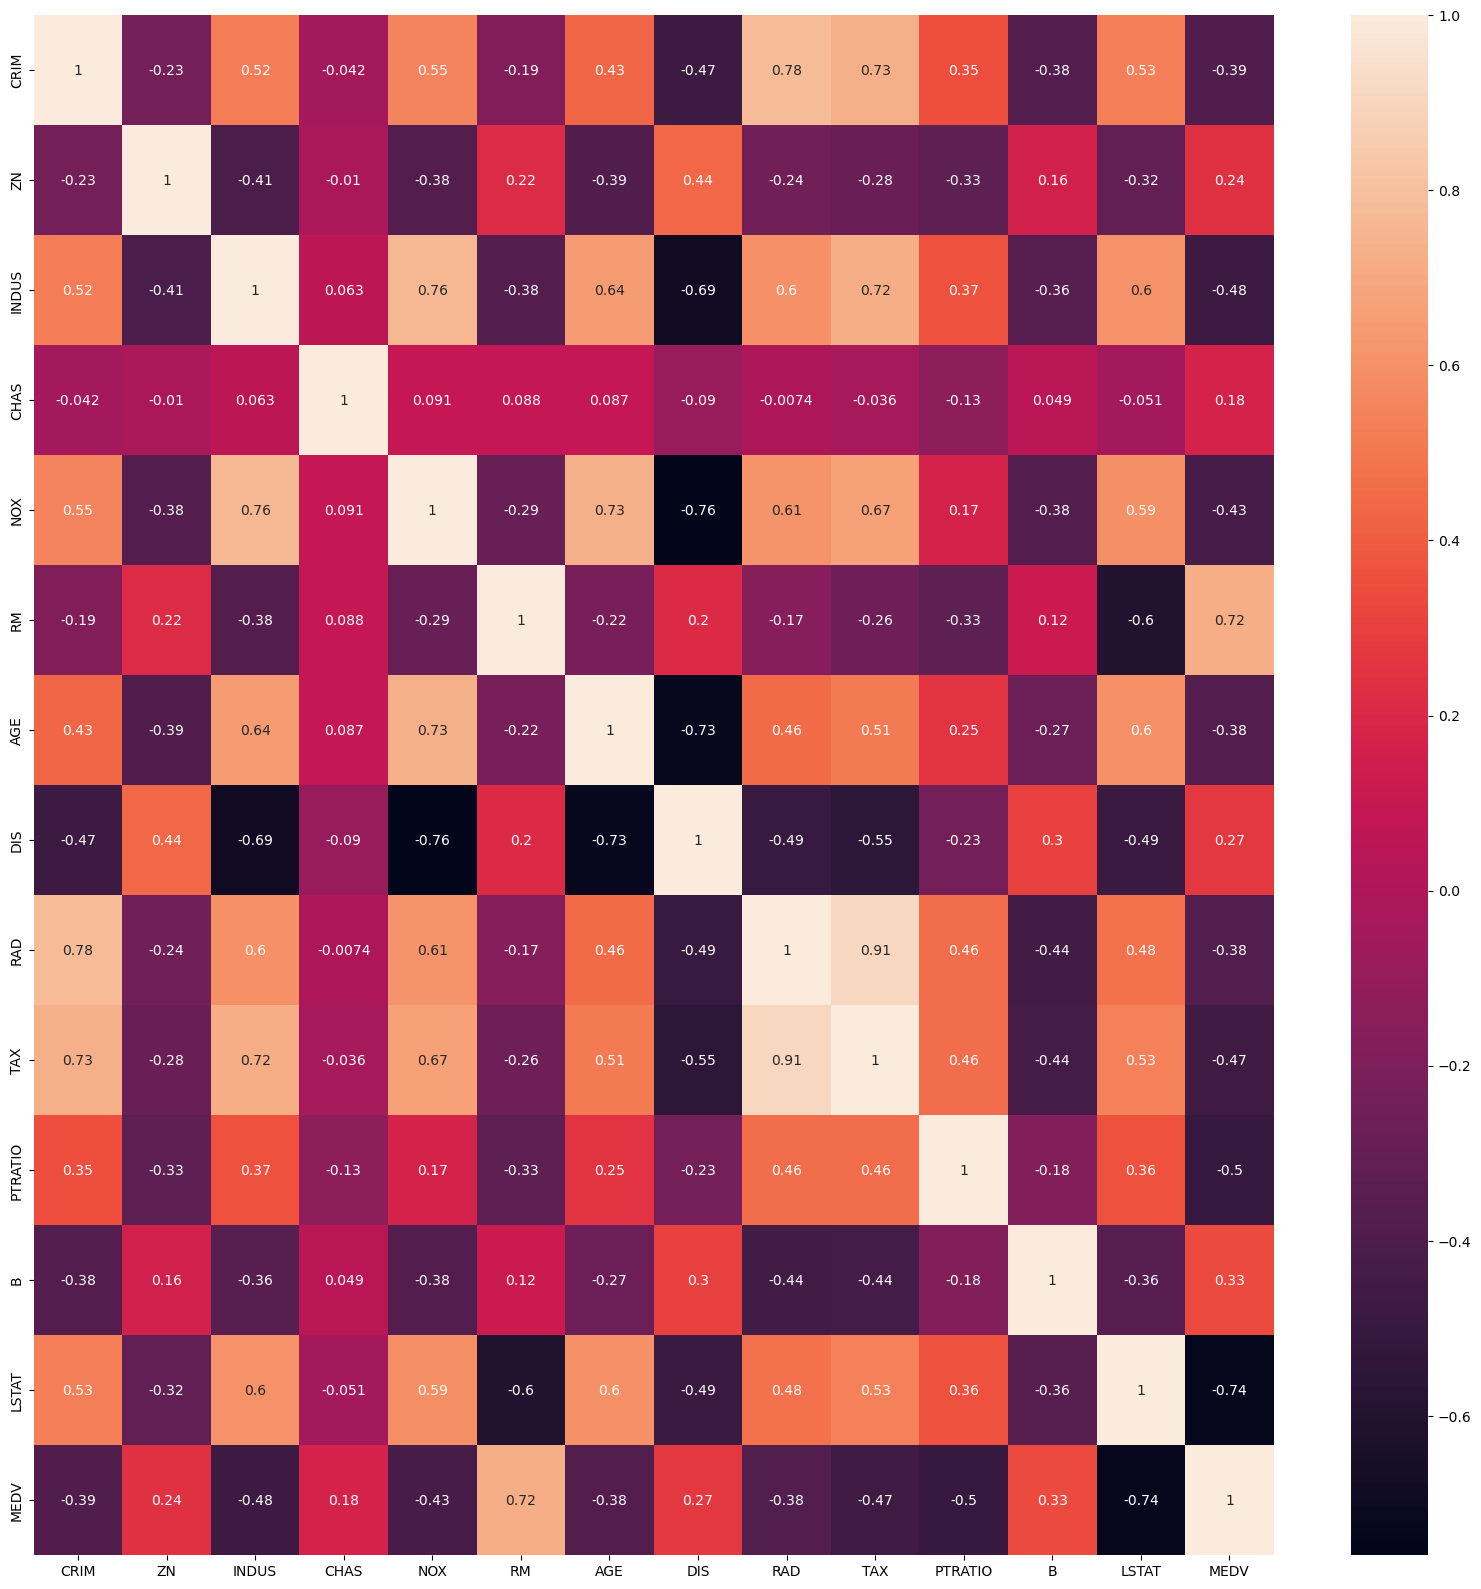

In [65]:
cor=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)

In [66]:
# there is no high collinearity b/w the target MEDV and the independent variables.

In [67]:
x=df.drop('MEDV',axis=1)
y=df.MEDV

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=44)

In [70]:
from sklearn.linear_model import LinearRegression
m=LinearRegression()


In [71]:
m.fit(x_train,y_train)

LinearRegression()

In [73]:
y_pred=m.predict(x_test)

In [74]:
y_test

316    17.8
218    21.5
485    21.2
274    32.4
427    10.9
       ... 
114    18.5
450    13.4
313    21.6
298    22.5
152    15.3
Name: MEDV, Length: 102, dtype: float64

In [75]:
y_pred

array([17.85960979, 25.51442523, 22.46550501, 34.34808544, 16.70622243,
       34.32136384, 20.20346474, 24.29136211, 27.80662803, 22.30520893,
       23.57759258, 22.84566356, 18.15526515, 24.80854664, 27.14487368,
        7.83999362, 20.92378781, 24.2819192 , 12.55856374, 20.01267107,
       29.61615488, 28.45824672, 39.10692313, 27.26364259, 15.60984784,
       19.0284781 , 10.81942194, 17.67265564, 19.87586454, 33.99500609,
       20.0241308 , 16.70556776, 13.46089915, 14.78694686, 20.58644077,
       19.60195726, 19.42162223, 34.18314288, 26.18242523, 28.97937253,
       19.90197369, 16.8141545 , 30.15136997, 22.28895081, 16.90034623,
       12.28569014, 35.68602694, 31.19877339,  8.62097584, 17.99366253,
       31.44890365, 31.47864805, 15.15008723, 12.17541504, 24.86959818,
       15.35247804, 34.65517878, 40.01757687, 11.38174808, 18.47161174,
       23.25073257, 12.92884927, 14.74971085, 20.18051925, 25.3799539 ,
       21.28644711, 27.52620601, 23.38959832, 30.74367522, 26.24

In [77]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [78]:
mean_absolute_error(y_test,y_pred)

3.174679046477337

In [79]:
mean_squared_error(y_test,y_pred)

17.669954546399342

In [80]:
r2_score(y_test,y_pred)

0.7908078651402864

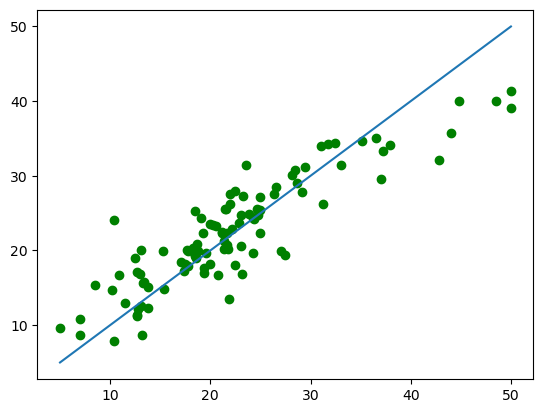

In [81]:
plt.scatter(y_test, y_pred,color='green')
p1=max(max(y_pred), max(y_test))
p2=min(min(y_pred),min(y_test))
plt.plot([p1,p2],[p1,p2])